<a href="https://colab.research.google.com/github/eddytiya/data_science/blob/main/main_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [ ]:
#@title 1.basics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [ ]:
data = pd.read_csv("tweets.csv")
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [ ]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
data["label"].value_counts(normalize=True)
#This method calculates the frequency of each unique value
#normalize=True---> category of data(which is +ve which is -ve)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

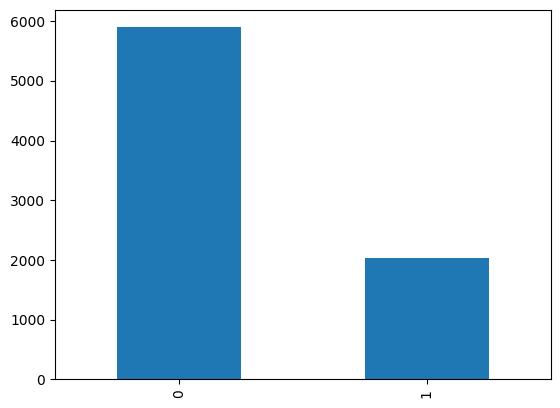

In [ ]:
data["label"].value_counts().plot(kind="bar")

In [ ]:
#@title 2.Data cleaning

In [ ]:
##########data cleaning##############################
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
#subsitituting
import re
re.sub(r"'s\b"," is",data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [ ]:
#removing user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
re.sub("@[A-Za-z0-9]+"," ",data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.   really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
#removing hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
re.sub("#","",data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [ ]:
#removing hyperlinks
re.sub(r"http\S+","",data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
#retaining only alphabets(getting rid of punctuations,special char ,digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [ ]:
re.sub(r"[^a-zA-Z]"," ",data['tweet'][25])



'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

re.sub(r"[^a-zA-Z]"," ",data['tweet'][0])

In [ ]:
#@title ------.STOP WORDS REMOVAL

In [ ]:
!pip install nltk

In [ ]:
import nltk

from nltk.corpus import stopwords


In [ ]:

nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
len(nltk_stopwords)

179

In [ ]:
#stopwords from sklearn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'de', 'them', 'until', 'further', 'amongst', 'up', 'himself', 'again', 'anyway', 'serious', 'around', 'empty', 'during', 'toward', 'they', 'she', 'thick', 'beforehand', 'nobody', 'whereas', 'take', 'except', 'twenty', 'see', 'ltd', 'anyone', 'give', 'hereupon', 'after', 'four', 'due', 'thin', 'it', 'if', 'before', 'go', 'others', 'seem', 'noone', 'although', 'us', 'seeming', 'herein', 'last', 'that', 'inc', 'is', 'same', 'top', 'he', 'hundred', 'have', 'those', 'hers', 'now', 'themselves', 'whole', 'please', 'indeed', 'via', 'our', 'many', 'has', 'itself', 'often', 'both', 'only', 'meanwhile', 'very', 'would', 'almost', 'over', 'otherwise', 'were', 'rather', 'can', 'seemed', 'formerly', 'per', 'show', 'else', 'less', 'cannot', 'becomes', 'either', 'her', 'of', 'his', 'this', 'someone', 'out', 'myself', 'whither', 'some', 'interest', 'name', 'system', 'onto', 'am', 'whether', 'cry', 'hereby', 'i', 'why', 'for', 'keep', 'moreover', 'no', 'their', 'nowhere', 'so', 'former', 'where', 'my'

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
#combining stopwords from sklearn and NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
print(combined_stopwords)
len(combined_stopwords)

{"haven't", 'them', 'de', "hasn't", 'isn', 'mustn', 'until', 'further', 'amongst', "wouldn't", 'up', 'himself', 'again', 'shan', 'anyway', 'serious', 'around', 'empty', 'during', "she's", 'toward', 'hasn', 'ma', 'they', 'she', 'thick', 'doing', 'beforehand', 'nobody', 'whereas', 'take', 'except', 'twenty', 'see', 'ltd', 'anyone', 't', "shan't", 'give', 'hereupon', 'after', 'four', 'due', 'thin', 'it', 'if', 'before', 'go', 'others', "aren't", 'seem', 'noone', 'although', 'us', 'seeming', 'herein', 'last', 'aren', 'that', 'inc', 'is', 'same', 'top', 'he', 'hundred', 'have', 'those', 'hers', 'now', 'themselves', 'whole', 'please', 'our', 'indeed', 'via', 'many', 'o', 'has', 'itself', "couldn't", 'theirs', 'often', 'both', 'wasn', 'only', 'just', 'meanwhile', 'very', 'would', 'more', 'over', 'almost', 'otherwise', 'were', 'does', 'rather', 'can', "wasn't", 'seemed', 'formerly', 'per', 'show', 'else', 'less', 'cannot', 'becomes', 'her', 'of', 'his', "hadn't", 'this', 'either', 'someone', '

378

In [ ]:
#finding the common words between these 2 sets
common=nltk_stopwords.intersection(sklearn_stopwords)
print(common)
len(common)

{'do', 'them', 'ourselves', 'yours', 'until', 'few', 'further', 'up', 'himself', 'again', 'during', 'because', 'what', 'from', 'they', 'she', 'a', 'under', 'in', 'being', 'will', 'are', 'about', 'its', 'each', 'after', 'it', 'if', 'yourself', 'at', 'against', 'before', 'here', 'which', 'be', 'that', 'through', 're', 'is', 'same', 'he', 'than', 'have', 'those', 'but', 'hers', 'now', 'themselves', 'all', 'own', 'our', 'been', 'as', 'has', 'not', 'itself', 'both', 'the', 'only', 'should', 'such', 'very', 'when', 'over', 'were', 'can', 'these', 'once', 'him', 'while', 'her', 'of', 'his', 'this', 'out', 'myself', 'above', 'nor', 'some', 'am', 'ours', 'i', 'where', 'their', 'for', 'why', 'had', 'no', 'so', 'my', 'an', 'most', 'we', 'your', 'by', 'me', 'off', 'you', 'any', 'into', 'to', 'too', 'and', 'below', 'other', 'how', 'whom', 'who', 'with', 'there', 'on', 'or', 'yourselves', 'down', 'between', 'herself', 'was', 'more', 'then'}


119

In [ ]:
#text normalization:stemming or lemmatization(prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
data['tweet'][63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [ ]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
new_sent = ''
for token in data['tweet'][63].split():#.split will convert it into a list of words
  new_sent=new_sent+lemmatizer.lemmatize(token.lower())+' '

new_sent


'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [ ]:
#@title ----defining the cleaner function and apply


In [ ]:
def tweet_cleaner_without_stopwords(text):
  new_text=re.sub(r"'s\b"," is",text)
  new_text=re.sub("#","",new_text)
  new_text=re.sub("@[A-Za-z0-9]+"," ",new_text)
  new_text=re.sub(r"http\S+","",new_text)
  new_text=contractions.fix(new_text)
  new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
  new_text=new_text.lower().strip()

  cleaned_text=''
  for token in new_text.split():
      cleaned_text = cleaned_text + lemmatizer.lemmatize(token)+' '

  return cleaned_text

In [ ]:
cleaned_tweets = []
for twt in data['tweet']:
  cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [ ]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [ ]:

data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [ ]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [ ]:
data['cleaned_tweets_w/O_SW']=cleaned_tweets#also removing the stopping words here
data.head()

,id,label,tweet,cleaned_tweets_w/O_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


In [ ]:
#@title 3.data visualization

In [ ]:
#visualizating the top 25 most common words in this tweets dataset
all_words=[]
for t in data['tweet']:
  all_words.extend(t.split())
print(all_words[:50])
len(set(all_words))#total no of words in the dataset

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

In [ ]:
import matplotlib.pyplot as plt


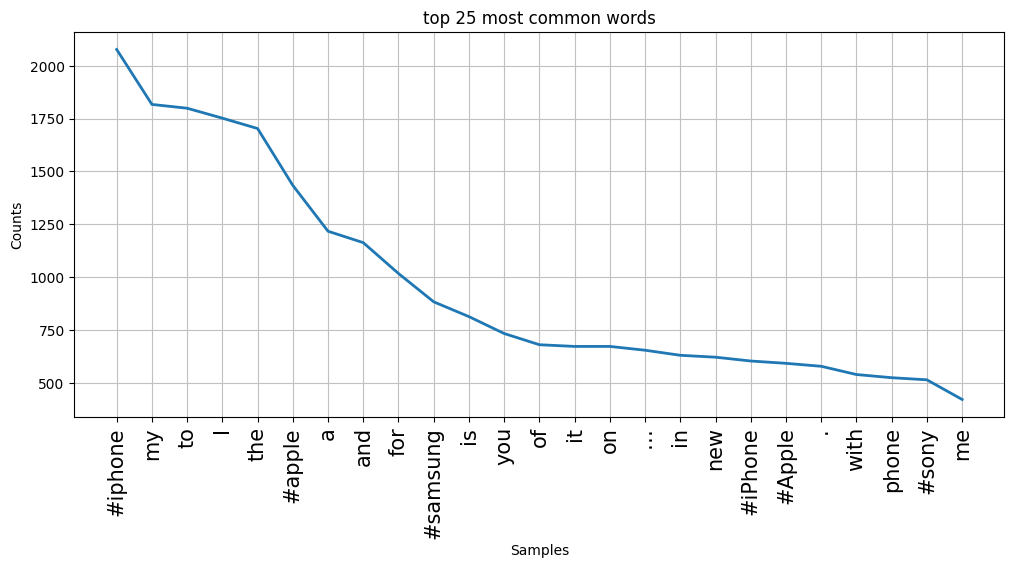

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
#frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False )

plt.show
#but the outputs are useless
#since this pllot was created for original tweets

In [ ]:
#@title -----plot for cleaner tweets

In [ ]:
"""plot for cleaned tweet"""
all_words=[]
for t in data['cleaned_tweets_w/O_SW']:
  all_words.extend(t.split())
print(all_words[:50])
len(set(all_words))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


15993

In [ ]:
len(set(all_words))

15993

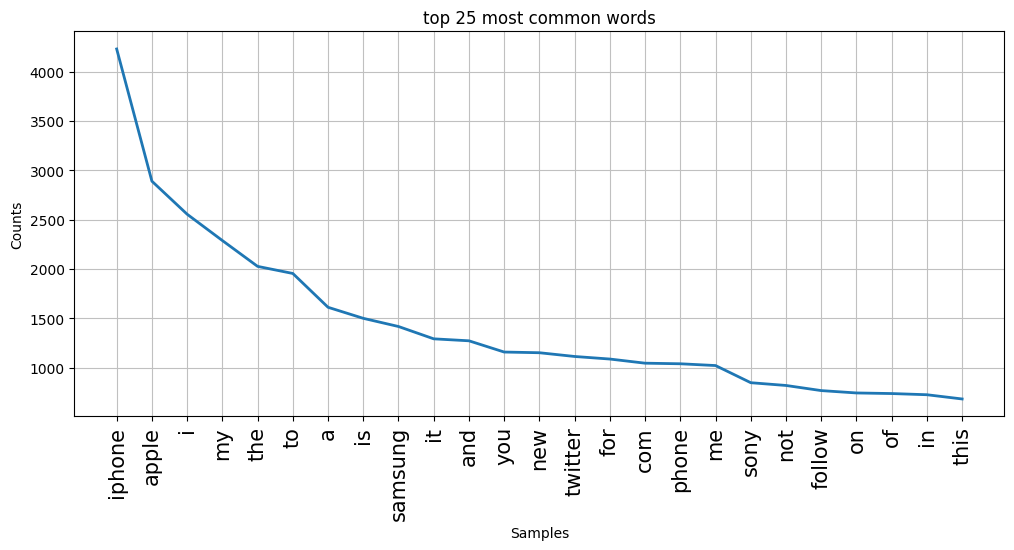

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
#frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False )

plt.show



In [ ]:
#@title for words with meaning after applying stopwords

In [ ]:
#rewriting the cleaner function
"""lets check the plot after applying stop words"""
def tweet_cleaner_with_stopwords(text):
  new_text=re.sub(r"'s\b"," is",text)
  new_text=re.sub("#","",new_text)
  new_text=re.sub("@[A-Za-z0-9]+"," ",new_text)
  new_text=re.sub(r"http\S+","",new_text)
  new_text=contractions.fix(new_text)
  new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
  new_text=new_text.lower().strip()
#syntax:[expression for item i iterable if condition]
  new_text=[token for token in new_text.split() if token not in combined_stopwords]
  new_text=[token for token in new_text if len(token)>2]

  cleaned_text=''
  for token in new_text:
      cleaned_text = cleaned_text + lemmatizer.lemmatize(token)+' '

  return cleaned_text

In [ ]:
cleaned_tweets=list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [ ]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets_w/O_SW'], dtype='object')

In [ ]:
data['cleaned_tweets_with_SW']= cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/O_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [ ]:
all_words=[]
for t in data['cleaned_tweets_with_SW']:
  all_words.extend(t.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


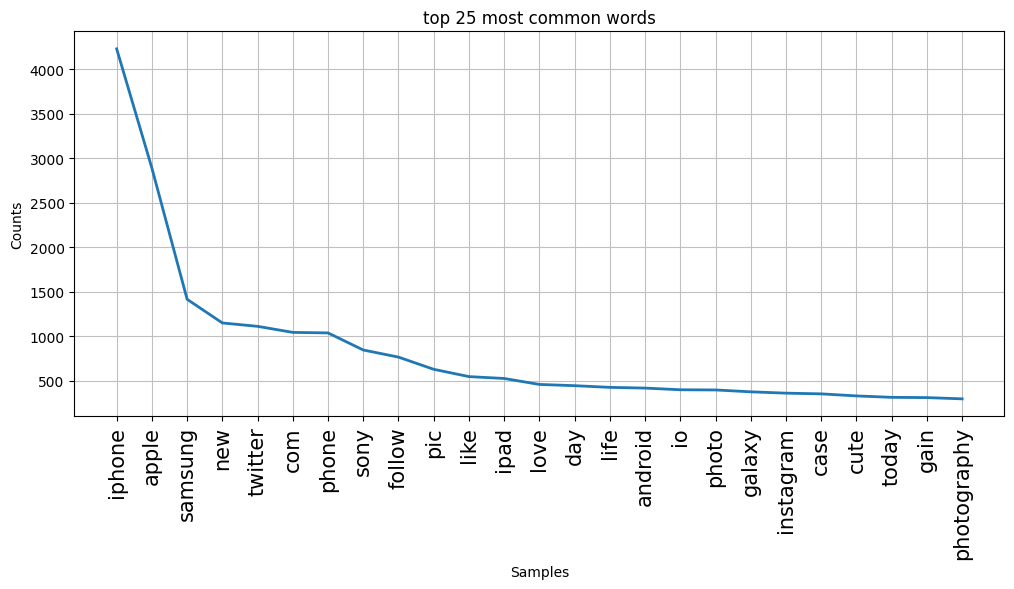

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
#frequency Distribution for more meaningful words
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False )

plt.show
#still no meaningful words to be removed like com,pic,envn twitter

In [ ]:

domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)
print(final_stopwords)

['phone', 'mobile', 'twitter', 'rt', 'com', 'follow', "haven't", 'them', 'de', "hasn't", 'isn', 'mustn', 'until', 'further', 'amongst', "wouldn't", 'up', 'himself', 'again', 'shan', 'anyway', 'serious', 'around', 'empty', 'during', "she's", 'toward', 'hasn', 'ma', 'they', 'she', 'thick', 'doing', 'beforehand', 'nobody', 'whereas', 'take', 'except', 'twenty', 'see', 'ltd', 'anyone', 't', "shan't", 'give', 'hereupon', 'after', 'four', 'due', 'thin', 'it', 'if', 'before', 'go', 'others', "aren't", 'seem', 'noone', 'although', 'us', 'seeming', 'herein', 'last', 'aren', 'that', 'inc', 'is', 'same', 'top', 'he', 'hundred', 'have', 'those', 'hers', 'now', 'themselves', 'whole', 'please', 'our', 'indeed', 'via', 'many', 'o', 'has', 'itself', "couldn't", 'theirs', 'often', 'both', 'wasn', 'only', 'just', 'meanwhile', 'very', 'would', 'more', 'over', 'almost', 'otherwise', 'were', 'does', 'rather', 'can', "wasn't", 'seemed', 'formerly', 'per', 'show', 'else', 'less', 'cannot', 'becomes', 'her', 

In [ ]:
#@title 4.bag of words model(frature extraction)
#converts unstructured things into tabular format


In [ ]:
data.shape

(7920, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CV= CountVectorizer()
CV_features=CV.fit_transform(data['cleaned_tweets_w/O_SW'])

In [ ]:
CV_features.shape


(7920, 15967)

In [ ]:
CV_features[0]
#matrix which contains a lot of zeros

<1x15967 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
CV_features[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import pandas as pd
df= pd.DataFrame(CV_features.todense())
df #this is our document term matrix
#Doucment term matrix X=[N*p]
#N-no of documents
#p=no of unique words in the vocab!!

,0,1,2,3,4,5,6,7,8,9,...,15957,15958,15959,15960,15961,15962,15963,15964,15965,15966
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.size/1e6 # the df matrix divided by 1million

126.45864

In [ ]:
import numpy as np
np.count_nonzero(df)

114991

In [ ]:
100*np.count_nonzero(df)/df.size
#for the percentage of non zero elements in the df matrixi.e=1

0.09093170699922125

In [ ]:
CV.get_feature_names_out()[:50] #these are the vocabulary words

array(['aa', 'aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl',
       'aarhus', 'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal',
       'aaydojbfkq', 'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb',
       'abc', 'abdou', 'abe', 'aber', 'abercrombie', 'abi', 'ability',
       'abit', 'able', 'ableton', 'abnqum', 'aboard', 'about',
       'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight',
       'above', 'abp', 'abscbn', 'absence', 'absolute', 'absolutely',
       'absurd', 'abu', 'abudhabi', 'abuja', 'abujacity', 'abujafct',
       'abujapeople', 'abujaphones'], dtype=object)

In [ ]:
len(CV.get_feature_names_out())

15967

In [ ]:
CV_features[10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
CV.inverse_transform(np.array(CV_features[10].todense()))

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

In [ ]:
#@title 5.model building

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(CV_features,data['label'],test_size=0.25,stratify=data['label'], random_state=42)
#syntax:the training features, the testing features, the training labels (target values), and the testing labels.


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
print(LR.fit(X_train,y_train))

print(LR.score(X_train,y_train))#traindata score
print(LR.score(X_test,y_test))#test data score

#the model is over fitting because of training and testing difference
#1-2% of difference is okay lekin not more than that

LogisticRegression(solver='liblinear')
0.9779461279461279
0.8813131313131313


In [ ]:
#L!-regularization
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

#we got a better train and test score PERFECT(THIS IS A LESS OVERFITTED MODEL)

0.9038720538720538
0.8808080808080808


In [ ]:
#excessive number of features is the cause of overfitting

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = CV_features
y = data['label']

In [ ]:
#LR cross validation the lr2 model
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.6)
Kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results = cross_val_score(LR2,X,y,cv=Kfold,scoring='accuracy')
print(results)
print(np.round((results.mean())*100,2)),np.round((results.std())*100,2)
#this is a manual grid search



[0.89646465 0.88068182 0.8844697  0.90151515 0.89457071]
89.15


(None, 0.78)

In [ ]:
#our accuracy score is 89.15 +/- 0.78%

In [ ]:
#use cross_validate function to get our training accuracies
#how accurately the model can predict the target values for the examples it has seen during training.
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [ ]:
results#this is training scores

{'fit_time': array([0.05336118, 0.04158258, 0.04080534, 0.03732347, 0.03447843]),
 'score_time': array([0.00181079, 0.00136495, 0.00138021, 0.00137591, 0.00134373]),
 'test_score': array([0.88320707, 0.86931818, 0.87752525, 0.89772727, 0.88699495]),
 'train_score': array([0.90388258, 0.90893308, 0.9040404 , 0.90372475, 0.90435606])}

In [ ]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))
#mean of training scores is 90% and standard deviation is 0.2%

[0.90388258 0.90893308 0.9040404  0.90372475 0.90435606]
90.5 0.2


In [ ]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))
#mean of test scores is 88% and standard deviation is 0.93%

[0.88320707 0.86931818 0.87752525 0.89772727 0.88699495]
88.3 0.95


In [ ]:
#@title ---finding the c value
#The goal is to find the 'C' value that results in the highest accuracy when the model is trained and tested on the data, using cross-validation


In [ ]:
## Hyper parameter tuning of the LR1 model '''not much required'''
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
#Grid search is a technique in machine learning that helps find the best combination of hyperparameters (settings that control a model's behavior) for a given algorithm.

In [ ]:
#just printing the grid search results
grid_results
#navigate to get thte best value

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_
#best parameter value=0.95

({'C': 0.95001}, 0.8904040404040403, 19)

In [ ]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.04040404040403

In [ ]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

93.28282828282829

In [ ]:
#fun fact because of these results AI cannot replace us

In [ ]:
#"C" value controls the strength of regularization, with smaller values of "C" meaning stronger regularization and simplify the model and larger values meaning weaker regularization.

In [ ]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6457935279062846

In [ ]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84507576, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88143939, 0.88282828, 0.88497475,
       0.8854798 , 0.8864899 , 0.88712121, 0.88876263, 0.88926768,
       0.88888889, 0.88939394, 0.88939394, 0.88989899, 0.89040404])

In [ ]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.84996843, 0.86998106, 0.8803346 , 0.88721591,
       0.89236111, 0.89649621, 0.9009154 , 0.90498737, 0.90808081,
       0.91000631, 0.91344697, 0.91565657, 0.91856061, 0.92133838,
       0.92335859, 0.9260101 , 0.92853535, 0.93055556, 0.93282828])

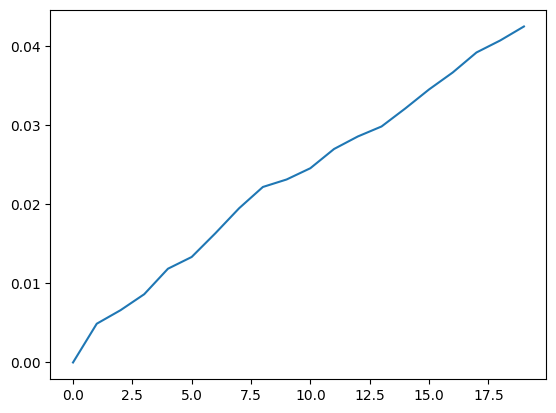

In [ ]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])
#the graph below simply shows the difference between the training scores and test scores w.r.t C values

In [ ]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [ ]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [ ]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  4.89267677e-03,  6.59722222e-03,  8.61742424e-03,
        1.18371212e-02,  1.33207071e-02,  1.63194444e-02,  1.94760101e-02,
        2.21590909e-02,  2.31060606e-02,  2.45265152e-02,  2.69570707e-02,
        2.85353535e-02,  2.97979798e-02,  3.20707071e-02,  3.44696970e-02,
        3.66161616e-02,  3.91414141e-02,  4.06565657e-02,  4.24242424e-02])

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/O_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )#count vecorizer creates a vocab extract he features and unstructured to structured,logistic

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

88.3 0.95


In [ ]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [ ]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15967

In [ ]:
print(CV_pipe['CV'].vocabulary_)#now we can se the words and the frequency of the words

{'fingerprint': 4551, 'pregnancy': 10883, 'test': 13769, 'android': 452, 'apps': 666, 'beautiful': 1206, 'cute': 3020, 'health': 5928, 'igers': 6447, 'iphoneonly': 7025, 'iphonesia': 7038, 'iphone': 6989, 'finally': 4535, 'transparant': 14210, 'silicon': 12520, 'case': 2142, 'thanks': 13811, 'to': 14066, 'my': 9251, 'uncle': 14536, 'yay': 15700, 'sony': 12843, 'xperia': 15620, 'sonyexperias': 12853, 'we': 15116, 'love': 8237, 'this': 13930, 'would': 15499, 'you': 15806, 'go': 5357, 'talk': 13581, 'makememories': 8453, 'unplug': 14600, 'relax': 11542, 'smartphone': 12690, 'wifi': 15313, 'connect': 2706, 'am': 378, 'wired': 15358, 'know': 7632, 'george': 5193, 'wa': 14987, 'made': 8394, 'that': 13822, 'way': 15096, 'daventry': 3132, 'home': 6130, 'what': 15216, 'amazing': 389, 'service': 12301, 'apple': 583, 'will': 15323, 'not': 9713, 'even': 4148, 'me': 8641, 'about': 31, 'question': 11233, 'have': 5877, 'unless': 14589, 'pay': 10319, 'them': 13862, 'for': 4735, 'their': 13854, 'stupid

In [ ]:
#@title 6.pipeline model without and with stop_words

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/O_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)#############
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))
#we can see there is a drop in the accuracy score when we use without stopwords

86.87 1.07


In [ ]:
#now we get a machine learning model after applying the stop words

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/O_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords,min_df=10,max_features=None)#min_df=minimum document frequency any words which is not occuring in less than 10 tweets are removed
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )#count vecorizer,logistic

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

86.78 1.04


In [ ]:
CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

1086

In [ ]:
#dropping the stop words inproved the database vocabulary by 2%
#dropped from 15000 words to 1000 words
#this tmeans the remaining 14000 words were not contributing to the model
#choosing which to deploy ill choose this one to deploy

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/O_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords,min_df=10,max_features=1000)#min_df=minimum document frequency
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )#count vecorizer,logistic

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

86.77 1.03


In [ ]:
CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)
#the final best model

1000

In [ ]:
#@title 7.TF-IDF Vector BoW Model S
#refer the matrix

In [ ]:
doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [ ]:
#(Term Frequency)TF_score = how many times a word from the vocabulary is appearing in a given doc / total no. of words in that doc
#TF(today | doc2) = 2/5
#TF_score will be high for "very frequent" words in a given doc

#IDF_score = log( (1+Total no. of documents) / (1+No. of documents contianing that "term") )
#IDF_score penalizes those those words which are EQUALLY frequent in almost all the documents

#TF_IDF score = TF_score*IDF_score


#the entire code is same insted of CV we use TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/O_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.15
85.29 0.82


1000

In [ ]:
#we got a lower score than count vectorizer so tfidf is not a good option instead of count vectorizer

In [ ]:
#@title 8.dimensionality Reduction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/O_SW']
y = data['label']


TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

#print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

#print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  #no of features AFTER applying the stopwords

86.82 0.15
85.29 0.82


1000

In [ ]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(max_features=1000, min_df=5,
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             "haven't", 'them', 'de', "hasn't", 'isn', 'mustn',
                             'until', 'further', 'amongst', "wouldn't", 'up',
                             'himself', 'again', 'shan', 'anyway', 'serious',
                             'around', 'empty', 'during', "she's", 'toward',
                             'hasn', 'ma', 'they', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
#@title 9.N-gram model
#till now we have used the unigram model
#now we want to include only those words in the vocabulary which have df of 5,
#meaning select only those words which occur ATLEAST in 5 documents
#AND SELECT the TOP 1000 feaures ONLY to build the model

In [ ]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/O_SW']
y = data['label']


CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.2
86.84 0.68


3322

In [ ]:
#now the size of the vocab is hifger beacuse we are using unigram and bigram both

In [ ]:
CV.vocabulary_

{'fingerprint': 903,
 'test': 2950,
 'android': 64,
 'apps': 175,
 'beautiful': 252,
 'cute': 624,
 'health': 1241,
 'igers': 1332,
 'iphoneonly': 1561,
 'iphonesia': 1570,
 'iphone': 1461,
 'android apps': 66,
 'apps beautiful': 176,
 'beautiful cute': 254,
 'igers iphoneonly': 1335,
 'iphoneonly iphonesia': 1566,
 'iphonesia iphone': 1573,
 'finally': 894,
 'case': 430,
 'thanks': 2974,
 'yay': 3284,
 'sony': 2716,
 'xperia': 3277,
 'sony xperia': 2737,
 'love': 1789,
 'talk': 2917,
 'relax': 2416,
 'smartphone': 2677,
 'wifi': 3221,
 'connect': 557,
 'iphone smartphone': 1537,
 'wired': 3234,
 'know': 1656,
 'wa': 3172,
 'way': 3198,
 'home': 1279,
 'iphone cute': 1479,
 'amazing': 54,
 'service': 2587,
 'apple': 95,
 'question': 2367,
 'pay': 2164,
 'stupid': 2847,
 'support': 2880,
 'service apple': 2588,
 'software': 2706,
 'update': 3102,
 'fucked': 1001,
 'big': 288,
 'time': 2997,
 'iphones': 1569,
 'software update': 2707,
 'big time': 289,
 'happy': 1202,
 'instapic': 1426,


In [ ]:

CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             "haven't", 'them', 'de', "hasn't", 'isn', 'mustn',
                             'until', 'further', 'amongst', "wouldn't", 'up',
                             'himself', 'again', 'shan', 'anyway', 'serious',
                             'around', 'empty', 'during', "she's", 'toward',
                             'hasn', 'ma', 'they', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
# import joblib # efficient, easy-to-use, and cross-compatible data serialization, particularly for saving and loading large NumPy arrays and complex Python objects, such as machine learning models, to/from disk.
# joblib._version__

In [ ]:
!pip install mglearn
import mglearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



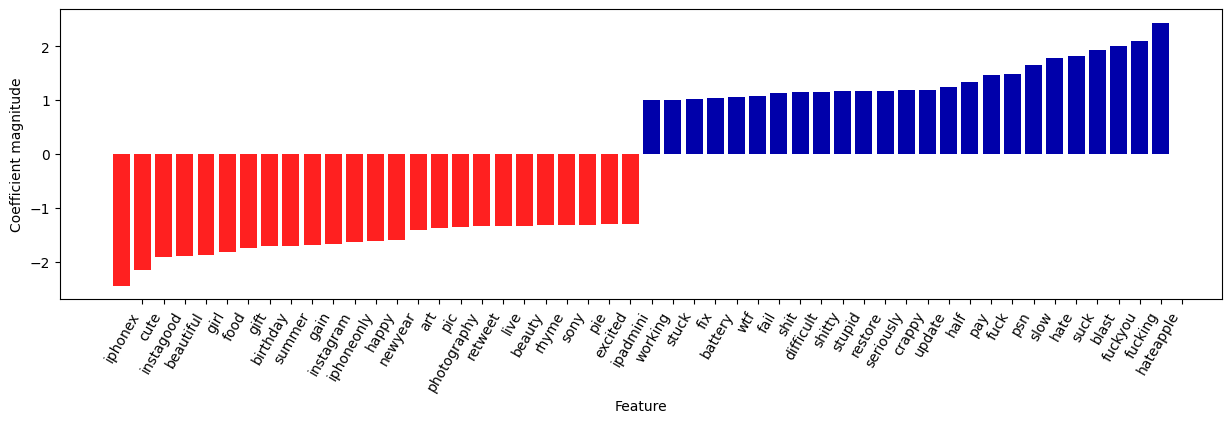

In [ ]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names_out(CV))
LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

#positive coefficients means words which were present in the bad commnets and vice versa

In [ ]:
len(coef.ravel()), len(feature_names)

(3322, 3322)

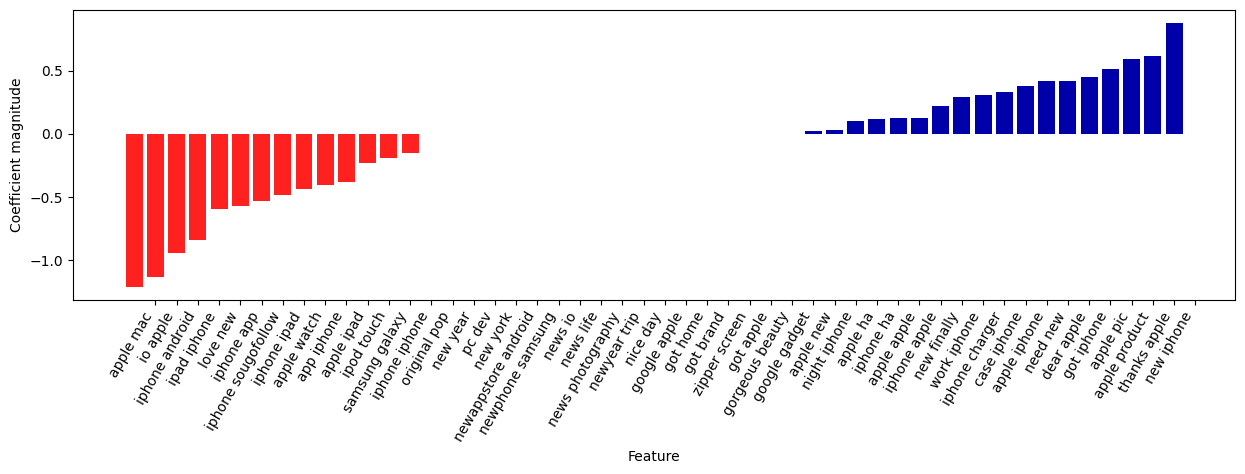

In [ ]:
# Visualizing only the
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)
#coefficients are extracted from logistic regression

In [ ]:
len(coef.ravel()), len(feature_names)

(3322, 3322)

In [ ]:
#@title 10.word embeddings

In [ ]:
data.to_pickle("tweets_cleaned.pkl")
#gensim is a library which contains pretrained models(word2vec and gloVe)

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec



In [ ]:
tweets_list = list(data['cleaned_tweets_w/O_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
tweets_list = list(data['cleaned_tweets_w/O_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [ ]:
!pip install gensim

In [ ]:

from gensim.models import Word2Vec


In [ ]:
# train model(CONTIMOUS BAG OFword  MODEL)
cbow_model = Word2Vec(tweets_list, vector_size = 10, window = 3, min_count=5, sg=0)
#sg=skipgram

In [ ]:
print(cbow_model)

Word2Vec<vocab=2420, vector_size=10, alpha=0.025>


In [ ]:
cbow_model.wv.index_to_key[:20]  # this your vocab

['iphone',
 'apple',
 'i',
 'my',
 'the',
 'to',
 'a',
 'is',
 'samsung',
 'it',
 'and',
 'you',
 'new',
 'twitter',
 'for',
 'com',
 'phone',
 'me',
 'sony',
 'not']

In [ ]:
len(cbow_model.wv.index_to_key)# no of words cbow model has generated

2420

In [ ]:
# Each document vector will have dimension [1 x 300]

In [ ]:
#function which generates and fetch the word vector of the above 2420 words
#approach1
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""


    #(using list comprehension) doc1 contains those words of the document which are included in the vocab
    #doc1=colllection of words that are part of the vocab||||| cbow_model.wv.index_to_key=this is our vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
      #for each word in tthe tokenized document if that word is present in our cbow dictionary the just collect that word
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)#convet into numpy array
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean


In [ ]:
# np.mean(model[doc], axis=0)
#simply generationg words in form of vectors

In [ ]:
tweets_temp = data['cleaned_tweets_w/O_SW'].apply(document_vector)

In [ ]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [1.1050426, -0.9885893, 1.8169342, 0.028232206, -0.22871967, -1.1711766, 1.3355621, 0.846143, -0.6150088, -0.96446186]
1    [-0.20361069, -0.3354129, 1.7770805, 0.09677552, 1.0009096, 0.20271173, 1.6802982, 0.4790492, -1.0515777, -0.48842755]
2     [-0.09283564, 0.39321128, 1.3161216, 0.26339352, 0.7254739, 0.27746755, 0.9213846, 0.8194017, -1.3651053, -1.1071805]
3      [-0.13151655, 0.68337315, 1.5376531, 0.06766246, 1.5016798, 0.4146897, 0.8752651, 0.8864867, -1.9748771, -1.0128782]
4      [-0.40529135, 0.42843238, 1.0548934, 0.15562092, 1.3291163, 0.5365739, 0.8996471, 1.0248863, -1.9233912, -1.0127085]
Name: cleaned_tweets_w/O_SW, dtype: object

In [ ]:
tweets_temp[0].shape  # each document vecotr is 300-dimensional !!

(10,)

In [ ]:
type(tweets_temp)

pandas.core.series.Series

In [ ]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 10
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 10)

In [ ]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = y
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
df.head()  #clearly shows dense vectors

,0,1,2,3,4,5,6,7,8,9,y
0,1.105043,-0.988589,1.816934,0.028232,-0.228720,-1.171177,1.335562,0.846143,-0.615009,-0.964462,0
1,-0.203611,-0.335413,1.777081,0.096776,1.000910,0.202712,1.680298,0.479049,-1.051578,-0.488428,0
2,-0.092836,0.393211,1.316122,0.263394,0.725474,0.277468,0.921385,0.819402,-1.365105,-1.107180,0
3,-0.131517,0.683373,1.537653,0.067662,1.501680,0.414690,0.875265,0.886487,-1.974877,-1.012878,0
4,-0.405291,0.428432,1.054893,0.155621,1.329116,0.536574,0.899647,1.024886,-1.923391,-1.012709,1


In [ ]:
df.shape

(7920, 11)

In [ ]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(7920, 10)

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

83.89 0.29
83.85 0.65


In [ ]:
X = data['cleaned_tweets_w/O_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.97 0.08
87.78 0.99


300

In [ ]:
#@title 11.Word Embeddings from GloVe Model

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
# model.index_to_key
def document_vector_GloVe(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(model.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [ ]:
#

In [ ]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [1.1050426, -0.9885893, 1.8169342, 0.028232206, -0.22871967, -1.1711766, 1.3355621, 0.846143, -0.6150088, -0.96446186]
1    [-0.20361069, -0.3354129, 1.7770805, 0.09677552, 1.0009096, 0.20271173, 1.6802982, 0.4790492, -1.0515777, -0.48842755]
2     [-0.09283564, 0.39321128, 1.3161216, 0.26339352, 0.7254739, 0.27746755, 0.9213846, 0.8194017, -1.3651053, -1.1071805]
3      [-0.13151655, 0.68337315, 1.5376531, 0.06766246, 1.5016798, 0.4146897, 0.8752651, 0.8864867, -1.9748771, -1.0128782]
4      [-0.40529135, 0.42843238, 1.0548934, 0.15562092, 1.3291163, 0.5365739, 0.8996471, 1.0248863, -1.9233912, -1.0127085]
Name: cleaned_tweets_w/O_SW, dtype: object

In [ ]:
#@title 12. Simple Deep Learning Model(Binary) Features'''

In [ ]:
#Binary classification tasks are a type of machine learning or statistical modeling problem where the goal is to categorize input data into one of two possible classes or categories. In binary classification:

#Two Classes: There are exactly two distinct categories or outcomes, often referred to as "positive" and "negative," "1" and "0," or "yes" and "no."

#Prediction: The model's primary objective is to predict which of the two classes a given input instance belongs to.

In [ ]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K

In [ ]:
# This user-defined function return a Deep Learning Model

def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model1.png', show_shapes=True)
    return model

In [ ]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]

    for i in range(n_repeats):
        # define network
        model = define_model(n_words)

        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)

        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)

        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [ ]:
# fit a tokenizer which convert unstructured data to structured
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# create the tokenizer
train_docs = data['cleaned_tweets_with_SW']
tokenizer = create_tokenizer(train_docs)

In [ ]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [ ]:
X.shape

(7920, 15359)

In [ ]:
X[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
y = data['label']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42)

In [ ]:
Xtrain.shape, Xtest.shape

((6336, 15359), (1584, 15359))

In [ ]:
# define network
K.clear_session()
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                983040    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 985153 (3.76 MB)
Trainable params: 985153 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.84536, saving model to BestModel.h5
32/32 - 5s - loss: 1.2238 - accuracy: 0.7152 - val_loss: 0.8454 - val_accuracy: 0.7634 - 5s/epoch - 156ms/step
Epoch 2/25

Epoch 2: val_loss improved from 0.84536 to 0.62747, saving model to BestModel.h5
32/32 - 3s - loss: 0.7270 - accuracy: 0.8031 - val_loss: 0.6275 - val_accuracy: 0.8502 - 3s/epoch - 82ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.62747 to 0.53635, saving model to BestModel.h5
32/32 - 3s - loss: 0.5827 - accuracy: 0.8686 - val_loss: 0.5364 - val_accuracy: 0.8707 - 3s/epoch - 100ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.53635 to 0.48604, saving model to BestModel.h5
32/32 - 2s - loss: 0.5111 - accuracy: 0.8855 - val_loss: 0.4860 - val_accuracy: 0.8722 - 2s/epoch - 64ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.48604 to 0.45100, saving model to BestModel.h5
32/32 - 2s - loss: 0.4637 - accuracy: 0.8865 - val_loss: 0.4510 - val_accuracy: 0.8722 - 2s/epoch

Text(0, 0.5, 'Loss Fn valaues')

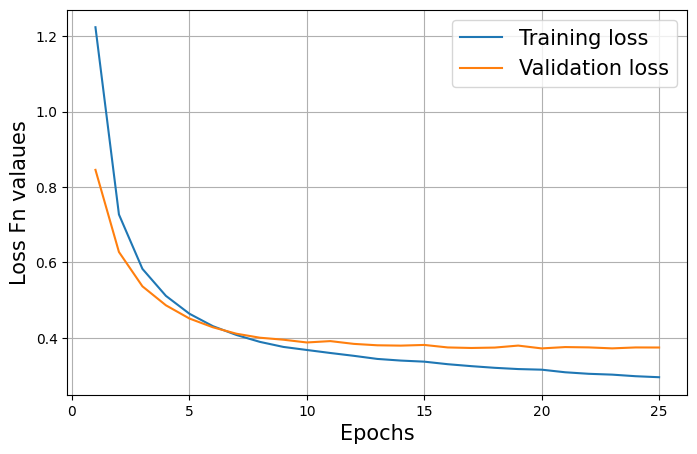

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)
#the lowest validation loss model is going to be saved

Text(0, 0.5, 'Accuracy')

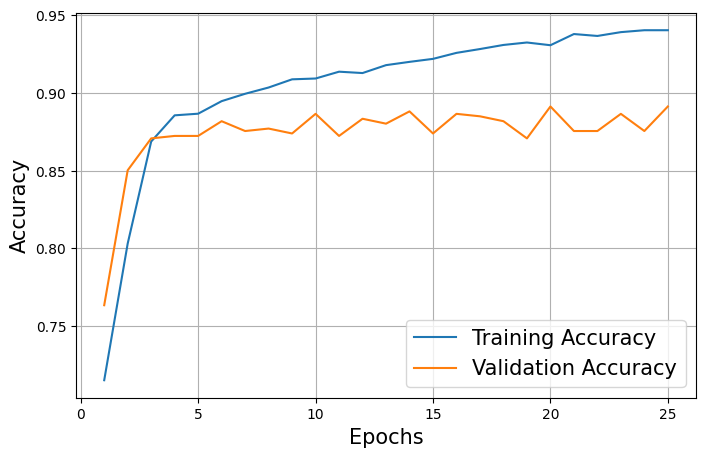

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [ ]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.078283


In [ ]:
# evaluate (Train & Test repeated 5 times)
res = evaluate_model(Xtrain, ytrain, Xtest, ytest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                983040    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 985153 (3.76 MB)
Trainable params: 985153 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1 accuracy: 0.8901515007019043
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                983040    
                               

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 927.9 kB/s eta 0:00:00


In [ ]:
#@title 13.Word Embedding Model using Keras Embedding Layer'''

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [ ]:
data.head()

,id,label,tweet,cleaned_tweets_w/O_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data['cleaned_tweets_w/O_SW'], data['label'],  test_size=0.2, random_state=42)


In [ ]:

Xtrain.shape

(6336,)

In [ ]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)

    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [ ]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Vocabulary size: 15359
Maximum length: 37


In [ ]:
tokenizer = create_tokenizer(Xtrain)
padded_docs_train = encode_docs(tokenizer, max_length, Xtrain)
padded_docs_train

array([[  134,   381,  4948, ...,  4960,  4961,     0],
       [   44,   348,    76, ...,     0,     0,     0],
       [  955,    54,     5, ...,     0,     0,     0],
       ...,
       [   10,   110,    10, ...,     0,     0,     0],
       [   44, 13842,     1, ...,     0,     0,     0],
       [   38,    62,    46, ...,     0,     0,     0]], dtype=int32)

In [ ]:
padded_docs_train.shape

(6336, 37)

In [ ]:
tokenizer = create_tokenizer(Xtest)
padded_docs_test = encode_docs(tokenizer, max_length, Xtest)
padded_docs_test.shape

(1584, 37)

In [ ]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features

    model.add(Conv1D(filters=64, kernel_size=8, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features

    model.add(Flatten()) # feature matrix is collapsed into one dimension.
    model.add(Dense(64, activation='relu'))  # hidden layer
    model.add(Dense(32, activation='relu'))  # hidden layer

    model.add(Dense(1, activation='sigmoid')) # output layer

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
#     model.summary()
    plot_model(model, to_file='model2.png', show_shapes=True)

    return model

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length))
The Embedding layer takes in three arguments:
input_dim: the size of the vocabulary in the text data
output_dim: the size of the dense embedding vector
input_length: the maximum length of input sequences.
The Conv1D layer takes in a few arguments:

filters: the number of filters to learn
kernel_size: the size of the kernel window
activation: the activation function to use
The MaxPooling1D layer takes in one argument: pool_size: the size of the pooling window

In [ ]:
# define model
K.clear_session()
model = define_model(vocab_size, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 300)           4607700   
                                                                 
 conv1d (Conv1D)             (None, 35, 64)            57664     
                                                                 
 max_pooling1d (MaxPooling1  (None, 17, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 320)               0

In [ ]:
# fit network
model.fit(padded_docs_train, ytrain, epochs=25, verbose=2, validation_data=(padded_docs_test, ytest))

# save the model
model.save('model_DL_WE.h5')


Epoch 1/25
198/198 - 26s - loss: 0.3348 - accuracy: 0.8425 - val_loss: 0.6923 - val_accuracy: 0.7254 - 26s/epoch - 129ms/step
Epoch 2/25
198/198 - 26s - loss: 0.1615 - accuracy: 0.9362 - val_loss: 1.2536 - val_accuracy: 0.7014 - 26s/epoch - 132ms/step
Epoch 3/25
198/198 - 21s - loss: 0.0853 - accuracy: 0.9725 - val_loss: 1.7120 - val_accuracy: 0.6919 - 21s/epoch - 106ms/step
Epoch 4/25
198/198 - 15s - loss: 0.0427 - accuracy: 0.9845 - val_loss: 1.6905 - val_accuracy: 0.6824 - 15s/epoch - 77ms/step
Epoch 5/25
198/198 - 15s - loss: 0.0205 - accuracy: 0.9935 - val_loss: 2.7460 - val_accuracy: 0.6982 - 15s/epoch - 77ms/step
Epoch 6/25
198/198 - 15s - loss: 0.0102 - accuracy: 0.9968 - val_loss: 2.4316 - val_accuracy: 0.6774 - 15s/epoch - 78ms/step
Epoch 7/25
198/198 - 21s - loss: 0.0041 - accuracy: 0.9991 - val_loss: 4.0539 - val_accuracy: 0.7027 - 21s/epoch - 106ms/step
Epoch 8/25
198/198 - 28s - loss: 0.0090 - accuracy: 0.9967 - val_loss: 3.1716 - val_accuracy: 0.7109 - 28s/epoch - 140ms/

In [ ]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(padded_docs_test, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 69.949496
